<a href="https://colab.research.google.com/github/vishal-burman/PyTorch-Architectures/blob/master/research/modeling_AutoEncoder/test_sample_ConvolutionalAutoEncoder(Without_Pooling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! rm -rf PyTorch-Architectures/
! git clone https://github.com/vishal-burman/PyTorch-Architectures.git
%cd PyTorch-Architectures/research/modeling_AutoEncoder/

In [2]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from model_ae_deconv import ConvolutionalAutoEncoder

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device: ', device)

# Hyperparameters
RANDOM_SEED = 456
LEARNING_RATE = 0.005
NUM_EPOCHS = 10
BATCH_SIZE = 128

Device:  cpu


In [ ]:
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
valid_dataset = datasets.MNIST(root="data",
                               train=False,
                               transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Sanity check
for images, labels in train_loader:
  print('Images Dimensions: ', images.shape)
  print('Labels Dimensions: ', labels.shape)
  break

In [ ]:
torch.manual_seed(RANDOM_SEED)
model = ConvolutionalAutoEncoder()
model.to(device)

In [6]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Total Trainable Parameters: ', params)

Total Trainable Parameters:  665


In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [8]:
model.train()
start_time = time.time()
for epoch in range(NUM_EPOCHS):
  for idx, (features, labels) in enumerate(train_loader):
    features = features.to(device)

    decoded = model(features)
    cost = F.binary_cross_entropy(decoded, features)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # LOGGING
    if idx % 50 == 0:
      print('Epoch: %04d/%04d || Batch: %04d/%04d || Loss: %.2f' % (epoch+1, NUM_EPOCHS, idx, len(train_loader), cost.item()))
  epoch_elapsed_time = (time.time() - start_time) / 60
  print('Epoch Elapsed Time: %.2f min' % (epoch_elapsed_time))
total_training_time = (time.time() - start_time) / 60
print('Total Training Time: %.2f min' % (total_training_time))

Epoch: 0001/0010 || Batch: 0000/0469 || Loss: 0.72
Epoch: 0001/0010 || Batch: 0050/0469 || Loss: 0.69
Epoch: 0001/0010 || Batch: 0100/0469 || Loss: 0.65
Epoch: 0001/0010 || Batch: 0150/0469 || Loss: 0.38
Epoch: 0001/0010 || Batch: 0200/0469 || Loss: 0.17
Epoch: 0001/0010 || Batch: 0250/0469 || Loss: 0.14
Epoch: 0001/0010 || Batch: 0300/0469 || Loss: 0.13
Epoch: 0001/0010 || Batch: 0350/0469 || Loss: 0.12
Epoch: 0001/0010 || Batch: 0400/0469 || Loss: 0.11
Epoch: 0001/0010 || Batch: 0450/0469 || Loss: 0.11
Epoch Elapsed Time: 0.24 min
Epoch: 0002/0010 || Batch: 0000/0469 || Loss: 0.11
Epoch: 0002/0010 || Batch: 0050/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0100/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0150/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0200/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0250/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0300/0469 || Loss: 0.10
Epoch: 0002/0010 || Batch: 0350/0469 || Loss: 0.09
Epoch: 0002/0010 || Batch: 0400/0469 || Loss: 0.09
Ep

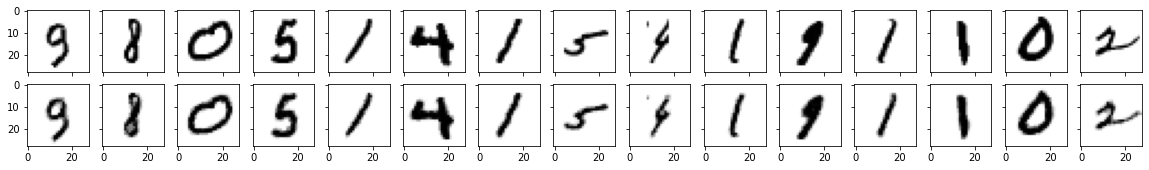

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')